In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def speedup_plot_all(data):
    size = set(data['problem']).pop()
    methodSet = set(data['method'])
    
    plt.figure(figsize=(12, 6))
    plt.xlabel("Liczba procesorów")
    plt.ylabel("Przyśpieszenie")
    plt.title("Przyśpieszenie, n = " + str(size))
    plt.grid(True)
    
    for method in methodSet:
        data_methoded = data.loc[data['method'] == method]
        t_1 = data_methoded['time'].iloc[0]
        size = data_methoded['problem'].iloc[0]
        speedup = data_methoded.apply(lambda x: t_1 / x.time  ,axis=1)
        x = data_methoded['tasks']
        y = speedup
        plt.plot( x, y, marker='o', label="Metoda: {}, Rozmiar: {}x{}".format(method, size, size))

    plt.legend(loc='best')

In [3]:
def efficiency_plot_all(data):
    size = set(data['problem']).pop()
    methodSet = set(data['method'])
    
    plt.figure(figsize=(12, 6))
    plt.xlabel("Liczba procesorów")
    plt.ylabel("Efektywność")
    plt.title("Efektywność, n = {}".format(size))
    plt.grid(True)
    
    for method in methodSet:
        data_methoded = data.loc[data['method'] == method]
        t_1 = data_methoded['time'].iloc[0]
        size = data_methoded['problem'].iloc[0]
        efficiency = data_methoded.apply(lambda x: t_1 / (x.time *x.tasks) ,axis=1)
        x = data_methoded['tasks']
        y = efficiency
        plt.plot( x, y, marker='o', label="Metoda: {}, Rozmiar: {}x{}".format(method, size, size))
    plt.legend(loc='best')

In [4]:
basic = pd.read_csv("logs/basic.csv")

In [5]:
problems = set(shared['problem'])
data = list()

for problem in sorted(problems):
    data.append(shared.loc[shared['problem'] == problem])

# for elem in data:
#     print(elem.head())


### Disclaimer
**punkty na wykresach zostały połączone w celu zwiększenia czytelności, wartości między jednym punktem a drugim nie mają odzwierciedlenia w rzeczywistości*

## Wnioski
Rozmiar 100x100:
* Dla rozmiaru tablicy 100x100 szybko zauważamy ze charakterystyka przyspieszenia w funkcji liczby procesorów szybko się nasyca i nie przekracza wartości 5.0; dla tego rozmiaru problemu obserwujemy lepsze przyspieszenie dla algorytmu Jacobiego niż Gaussa.
* Wraz z nasycaniem się przyspieszenia drastycznie maleje efektywność.

Rozmiar 150x150:
* Dla rozmiaru tablicy 150x150 obserwujemy znacznie lepsze przyspieszenie; zależność bardziej przypomina liniową niż logarytmiczną, osiągamy również lepsze przyspieszenie - prawie 7.0 w porównaniu do poprzedniego 5.0
* efektywność praktycznie nie schodzi niżej niż 60%
* w dalszym ciągu osiągamy lepsze przyspieszenie dla metody Jacobiego

Rozmiar 200x200:
* im większy rozmiar problemu tym lepsze przyspieszenie i efektywność, co można zauważyć na wykresie; charakterystyka jeszcze bardziej przypomina zależnośc liniową, osiągając przyspieszenie praktycznie 8.0
* efektywność praktycznie dla większości konfiguracji utrzymuje się powyżej poziomu 70%

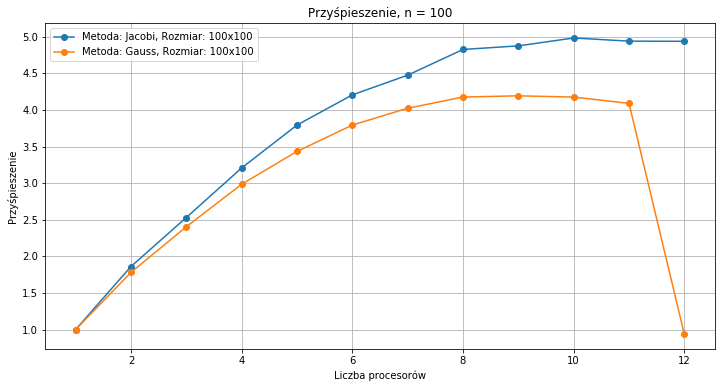

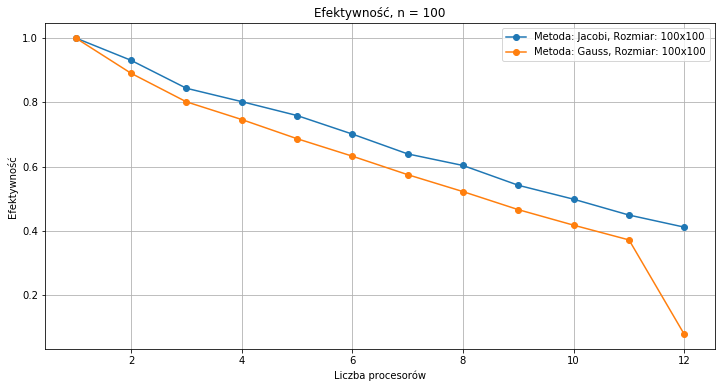

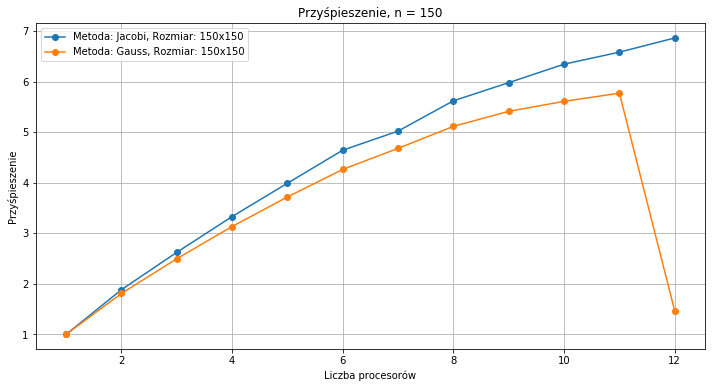

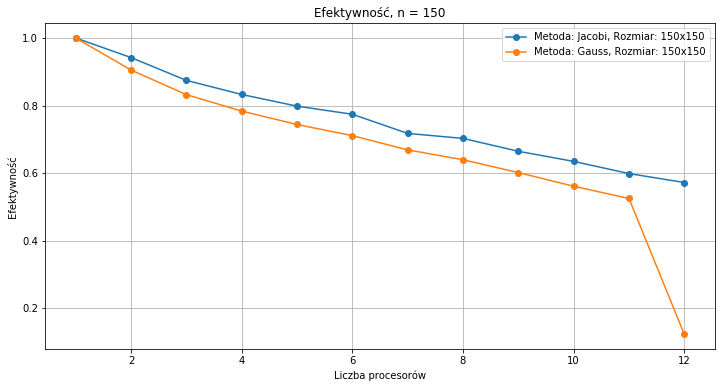

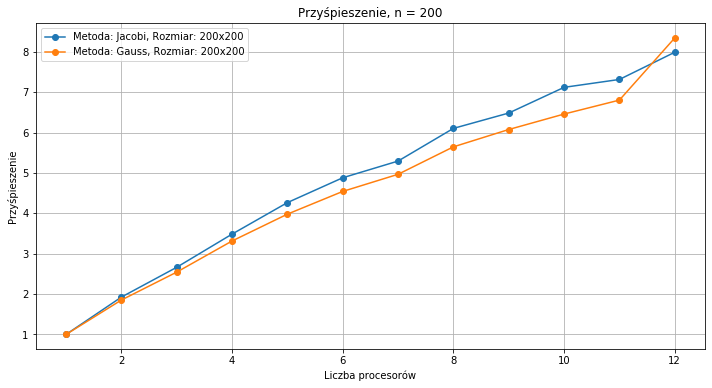

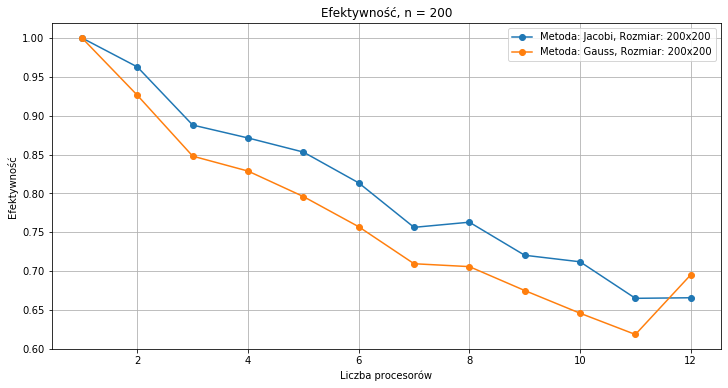

In [6]:
for elem in data:
    speedup_plot_all(elem)
    efficiency_plot_all(elem)

# Pamięć rozproszona

In [7]:
dist = pd.read_csv("data/dist.csv")

In [8]:
problems = set(dist['problem'])
data = list()

for problem in sorted(problems):
    data.append(dist.loc[dist['problem'] == problem])

# for elem in data:
#     print(elem.head())

### Disclaimer
**punkty na wykresach zostały połączone w celu zwiększenia czytelności, wartości między jednym punktem a drugim nie mają odzwierciedlenia w rzeczywistości*

## Wnioski
Rozmiar 100x100:
* otrzymujemy niewielkie przyspieszenie lekko ponad dwukrotne, po przekroczeniu którego przyspieszenie zaczyna spadać dla większej ilości procesorów, aż do wartości 1.5
* wyraźnie widać ile nas kosztuje narzut komunikacyjny spowodowany brakiem wspólnej pamięci i potrzebą przesyłania danych między nodami(localami) przez sieć

Rozmiar 150x150:
* dla większego rozmiaru problemu charakterystyka bardziej przypomina zależność liniową, choć jeszcze trochę jej brakuje
* osiągamy nasycenie przyspieszenia na poziomie 4.0


Rozmiar 200x200 - brak danych, Zeusowi nie starczyły 24h na wykonanie zadania

**Co ciekawe, rozważając pamięć wspólną metoda Jacobiego wypada lepiej niż meotoda Gaussa, natomiast rozważając pamięć rozproszoną, lepiej wypada metoda Gaussa. Może to być spowodowane samą budową metody Gaussa, która zakłada elementy tablicy odd i even, przez co metoda ta naturalnie lepiej się zrównolegla.**

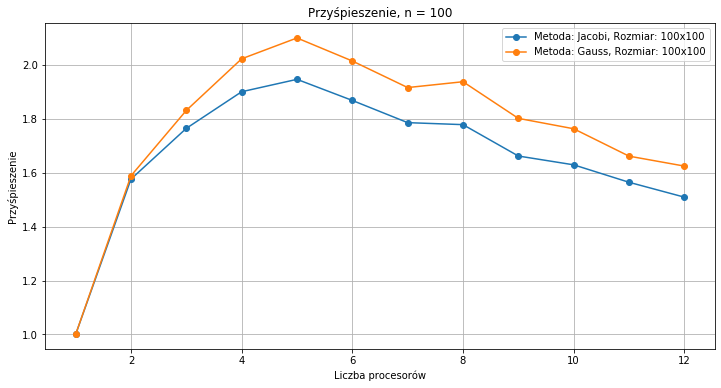

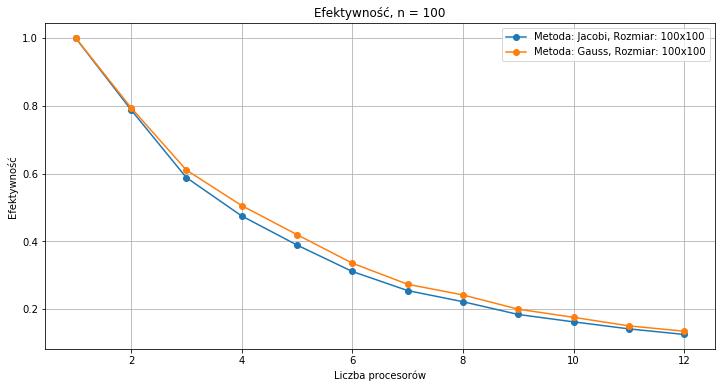

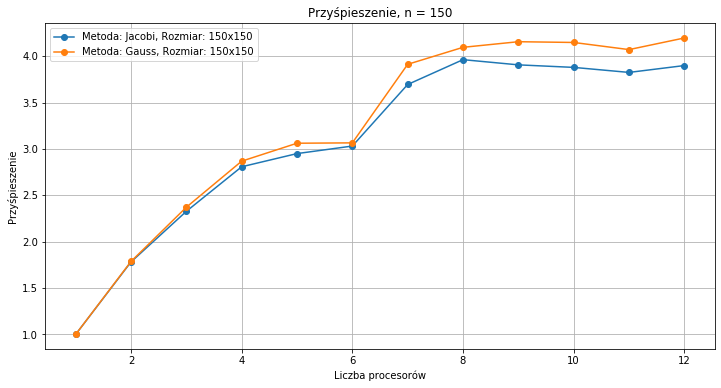

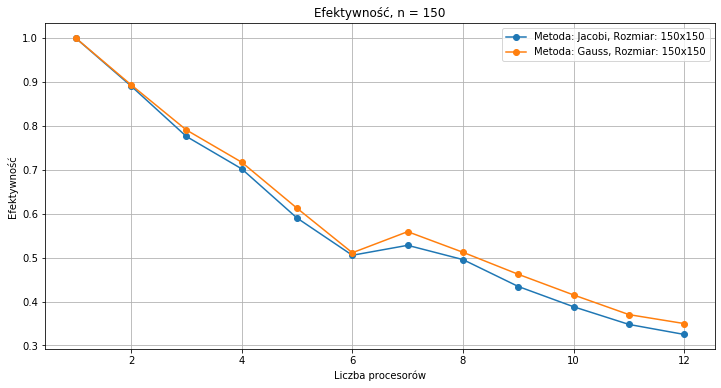

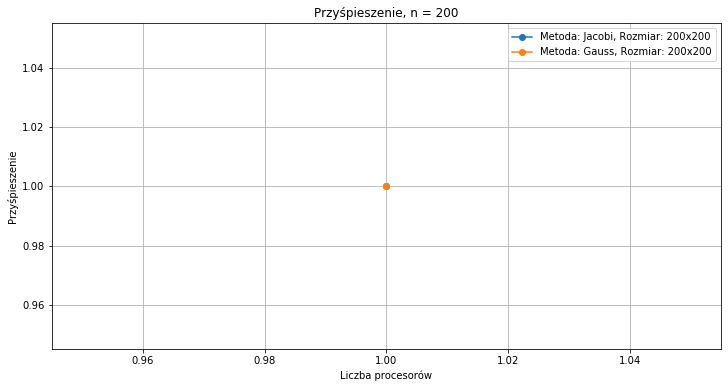

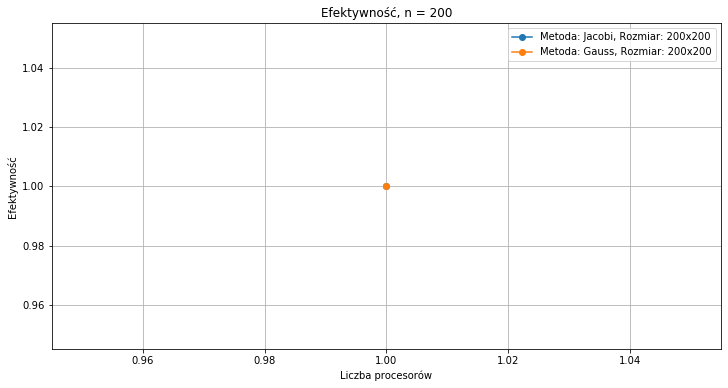

In [10]:
for elem in data:
    speedup_plot_all(elem)
    efficiency_plot_all(elem)